In [1]:
import warnings
warnings.filterwarnings("ignore")

# 1.Problématique
Dans ce notebook, nous explorons l'utilisation des algorithmes de clustering sur des données générées et des données du monde réel. Le clustering est un type d'apprentissage non supervisé qui regroupe des points de données similaires sans connaissance préalable des catégories. Cette approche est couramment utilisée pour l'analyse exploratoire des données, la segmentation de marché, la compression d'images, et bien plus encore.
L'objectif de ce notebook est de réaliser un clustering sur des données générées afin de comprendre le comportement et la performance de différents algorithmes de clustering. Nous allons générer des données synthétiques avec des distributions connues et appliquer diverses techniques de clustering pour observer leur capacité à séparer les données en clusters distincts. Cela permettra d'évaluer l'efficacité de ces méthodes.


# 2.Données simulées

Ce script génère quatre classes de points, chacune suivant une distribution gaussienne distincte avec des moyennes et des écarts types définis. Chaque classe est représentée par 50 points, et les données sont visualisées dans un plan 2D où chaque classe est colorée différemment. Cela permet d'illustrer visuellement la distribution des classes, ce qui est utile pour des tâches comme la classification ou le clustering. Les écarts types variés entre les classes montrent des différences dans la densité et la dispersion des points pour chaque groupe.

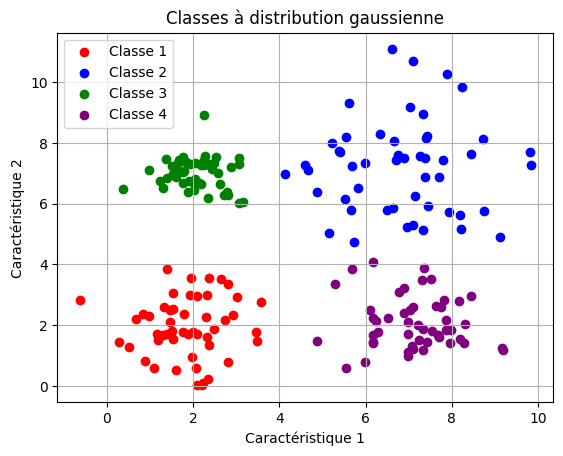

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixer la graine aléatoire pour la reproductibilité
np.random.seed(42)

# Nombre d'éléments par classe
n_elements = 50

# Définir la moyenne et l'écart type pour chaque classe
moyennes = [(2, 2), (7, 7), (2, 7), (7, 2)]
ecarts_types = [(1.0, 1.0), (1.5, 1.5), (0.5, 0.5), (1.0, 1.0)]

# Générer les données
donnees_classes = []
for moyenne, ecart_type in zip(moyennes, ecarts_types):
    donnees_classes.append(np.random.normal(loc=moyenne, scale=ecart_type, size=(n_elements, 2)))

# Combiner toutes les données des classes en un seul tableau
data = np.vstack(donnees_classes)

# Créer des étiquettes pour chaque classe
labels = np.array([0]*n_elements + [1]*n_elements + [2]*n_elements + [3]*n_elements)

# Tracer les données
couleurs = ['red', 'blue', 'green', 'purple']
for i in range(4):
    plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], color=couleurs[i], label=f'Classe {i+1}')

plt.title('Classes à distribution gaussienne')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.legend()
plt.grid(True)
plt.show()


# 3.Méthodes de classification utilisées

**1. K-Means**

Le K-Means est une méthode de clustering qui consiste à regrouper des données en un certain nombre de groupes, ou "clusters". L’algorithme commence par choisir aléatoirement des points appelés "centroides" (un par groupe), puis assigne chaque point de données au centroïde le plus proche. Ensuite, il met à jour les centroïdes en prenant la moyenne des points dans chaque groupe. Ce processus est répété jusqu’à ce que les points cessent de changer de groupe. K-Means est rapide mais fonctionne mieux quand les groupes sont de forme circulaire et de tailles similaires.

**2. Agglomerative Clustering**

L'agglomératif est une méthode hiérarchique qui fonctionne en fusionnant petit à petit les données. Au départ, chaque point de données est considéré comme un cluster individuel. Ensuite, à chaque étape, les deux clusters les plus proches sont fusionnés. Ce processus continue jusqu’à ce qu’il ne reste qu’un seul grand cluster ou un certain nombre défini de clusters. Il permet d’observer les relations entre les groupes à différents niveaux. Cette méthode ne fait pas d'hypothèses sur la forme des clusters mais peut être plus lente que K-Means.

**3. GMM (Gaussian Mixture Model)**

Le GMM suppose que les données proviennent de plusieurs sous-populations, chacune suivant une distribution gaussienne. Contrairement à K-Means qui assigne chaque point à un seul cluster, GMM calcule la probabilité qu’un point appartienne à plusieurs clusters, ce qui est utile pour des données qui ne se séparent pas de manière aussi nette. L’algorithme utilise une méthode appelée "Expectation-Maximization" pour ajuster les paramètres des distributions gaussiennes, améliorant ainsi les estimations à chaque itération.

**Différences principales :**

**K-Means :** Simple et rapide, mais limité aux clusters circulaires de taille similaire.

**Agglomerative :** Plus flexible sur la forme des clusters, mais plus lent car il fusionne les points étape par étape.

**GMM :** Permet des clusters de formes plus complexes, avec chevauchement, mais plus complexe à mettre en œuvre que K-Means.

# 4.Méthodes de validation du nombre de classes

  # **Indice de Rang (Rand Index)**

L'indice de Rand mesure la similarité entre deux partitions d'un ensemble de données, en comptant les paires de points qui sont correctement ou incorrectement groupés. La formule est la suivante :

$$\text{RI} = \frac{a + b}{a + b + c + d}$$

 
a : Le nombre de paires de points qui sont dans le même cluster dans les deux partitions.

b : Le nombre de paires de points qui sont dans des clusters différents dans les deux partitions.

c : Le nombre de paires de points qui sont dans le même cluster dans une partition, mais dans des clusters différents dans l'autre.

d : Le nombre de paires de points qui sont dans des clusters différents dans une partition, mais dans le même cluster dans l'autre.

L'indice de Rand est compris entre 0 (aucune similarité) et 1 (identiques).

# ****Indice de Silhouette****

L’indice de silhouette mesure à quel point un point de données est bien associé à son propre cluster par rapport aux autres clusters. Il est défini pour chaque point 𝑖 comme suit :

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

 
a(i) : La moyenne des distances entre le point 
𝑖
 et les autres points de son cluster.

b(i) : La moyenne des distances entre le point 
𝑖
 et les points du cluster le plus proche auquel il n’appartient pas.
L'indice de silhouette varie de -1 à 1 :

Un score proche de 1 signifie que le point est bien associé à son cluster.

Un score proche de 0 signifie qu'il est sur la frontière entre deux clusters.

Un score négatif signifie que le point est probablement mal classé.

L'indice de silhouette global pour l'ensemble du clustering est la moyenne des scores de silhouette de tous les points.

# 5. Application

# 5.1 Données simulées

          Modèle  Indice de Rand  Score de Silhouette
0         KMeans        0.986599             0.626647
1  Agglomerative        0.960630             0.613926
2            GMM        0.934168             0.602014


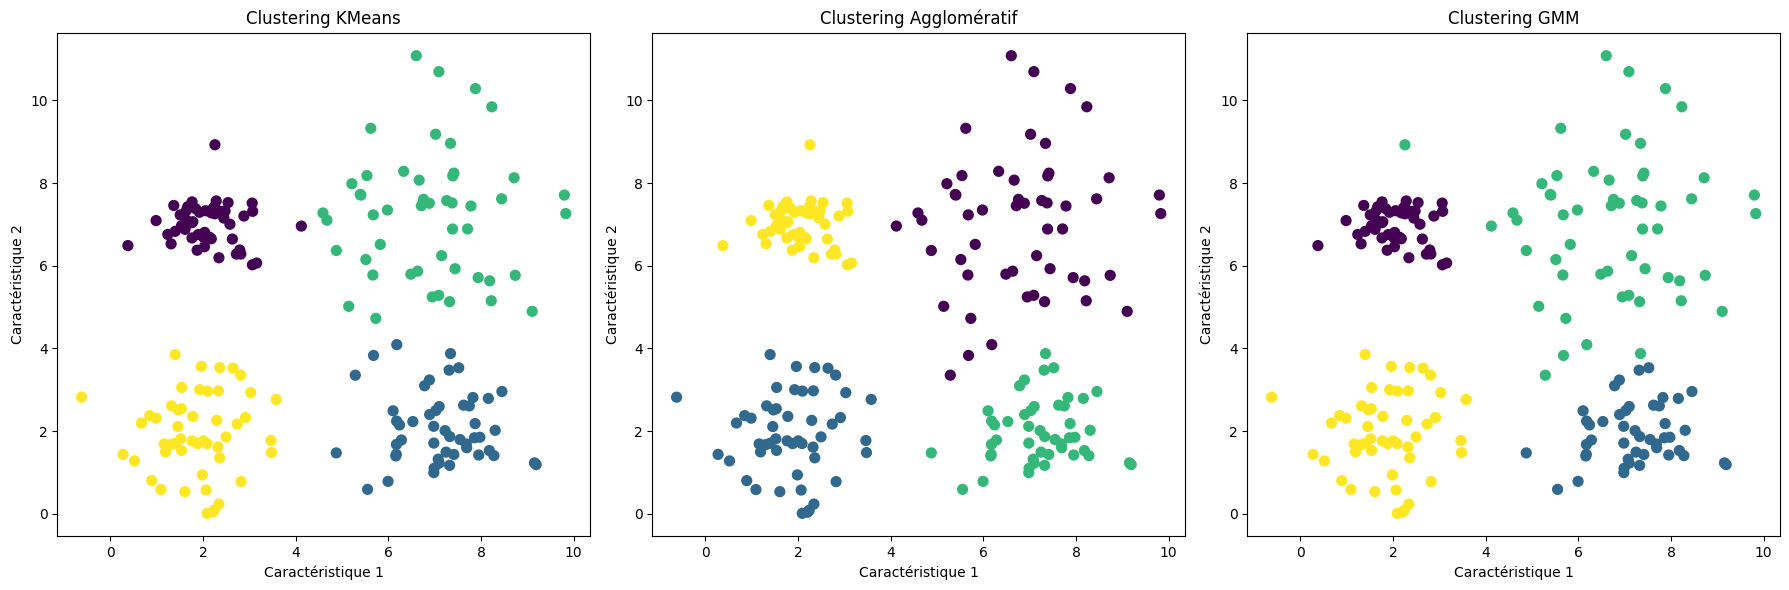

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Modèles de clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

agglomerative = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglomerative.fit_predict(data)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(data)

# Calculer l'indice de Rand ajusté et le score de Silhouette
rand_kmeans = adjusted_rand_score(labels, kmeans_labels)
rand_agglo = adjusted_rand_score(labels, agglo_labels)
rand_gmm = adjusted_rand_score(labels, gmm_labels)

silhouette_kmeans = silhouette_score(data, kmeans_labels)
silhouette_agglo = silhouette_score(data, agglo_labels)
silhouette_gmm = silhouette_score(data, gmm_labels)

# Stocker les résultats dans un DataFrame
resultats = pd.DataFrame({
    'Modèle': ['KMeans', 'Agglomerative', 'GMM'],
    'Indice de Rand': [rand_kmeans, rand_agglo, rand_gmm],
    'Score de Silhouette': [silhouette_kmeans, silhouette_agglo, silhouette_gmm]
})

# Afficher le tableau des résultats
print(resultats)

# Tracer les clusters pour comparer les modèles
plt.figure(figsize=(18, 6))

# Tracé pour KMeans
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('Clustering KMeans')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

# Tracé pour le clustering agglomératif
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=agglo_labels, cmap='viridis', s=50)
plt.title('Clustering Agglomératif')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

# Tracé pour le clustering GMM
plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title('Clustering GMM')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

# Afficher les tracés
plt.tight_layout()
plt.show()


KMeans semble être la méthode la plus performante dans ce cas, avec un indice de Rand presque parfait et le meilleur score de Silhouette. Le clustering agglomératif fonctionne également bien, mais est légèrement moins performant que KMeans. Le modèle GMM, bien qu'efficace, montre des clusters plus diffus et une légère perte de précision par rapport aux autres méthodes.

# 5.2 IRIS data

Le jeu de données des fleurs d'iris, ou jeu de données d'iris de Fisher, est un ensemble de données multivariées introduit par le statisticien, eugéniste et biologiste britannique Ronald Fisher dans son article de 1936 intitulé The use of multiple measurements in taxonomic problems (L'utilisation de mesures multiples dans les problèmes taxonomiques), comme exemple d'analyse discriminante linéaire. Il est parfois appelé jeu de données d'iris d'Anderson, car Edgar Anderson a collecté les données pour quantifier la variation morphologique des fleurs d'iris de trois espèces apparentées. Deux des trois espèces ont été collectées dans la péninsule de Gaspé, "toutes issues du même pâturage, cueillies le même jour et mesurées en même temps par la même personne avec le même appareil". L'article de Fisher a été publié dans la revue Annals of Eugenics, créant une controverse quant à l'utilisation continue du jeu de données d'iris pour l'enseignement des techniques statistiques aujourd'hui.

Le jeu de données comprend 50 échantillons de chacune des trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor). Quatre caractéristiques ont été mesurées pour chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres. En se basant sur la combinaison de ces quatre caractéristiques, Fisher a développé un modèle discriminant linéaire permettant de distinguer les espèces entre elles.

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)


In [4]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Charger le jeu de données Iris à partir d'un fichier CSV
iris = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

# Extraire les quatre premières colonnes (caractéristiques : longueur et largeur des sépales et pétales)
x = iris.iloc[:, [0, 1, 2, 3]].values


In [6]:
# Afficher des informations sur le jeu de données,
# telles que les types de données et le nombre de valeurs non nulles
iris.info()

# Afficher les 10 premières lignes du jeu de données
iris[0:10]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
x[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [8]:
# Distribution de fréquence des espèces
iris_outcome = pd.crosstab(index=iris["species"],  # Créer une table croisée avec l'espèce en index
                           columns="count")       # Ajouter une colonne pour compter le nombre d'occurrences

# Afficher la distribution des espèces
iris_outcome


col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [9]:
# Filtrer et stocker les données pour chaque espèce d'iris
 # Sélectionner toutes les lignes où l'espèce est "Iris-setosa"
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]   
# Sélectionner toutes les lignes où l'espèce est "Iris-virginica"
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]  
 # Sélectionner toutes les lignes où l'espèce est "Iris-versicolor"
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"] 


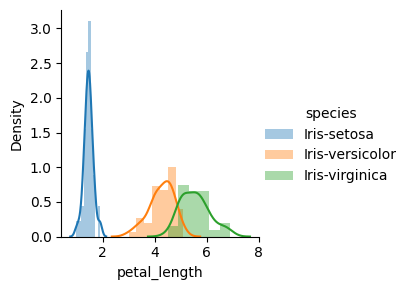

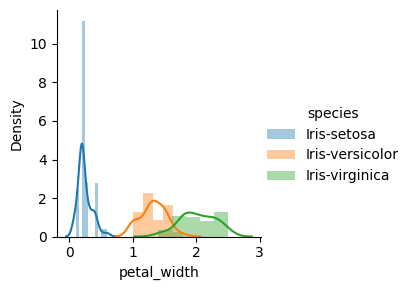

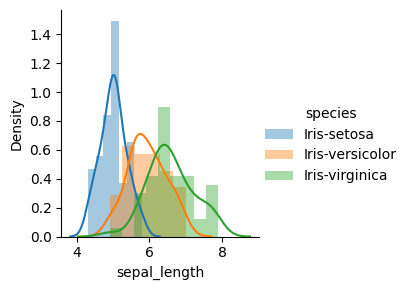

In [10]:
# Création de graphiques pour visualiser la distribution des caractéristiques selon les espèces

# Distribution de la longueur des pétales pour chaque espèce
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "petal_length").add_legend()

# Distribution de la largeur des pétales pour chaque espèce
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "petal_width").add_legend()

# Distribution de la longueur des sépales pour chaque espèce
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "sepal_length").add_legend()

# Afficher les graphiques
plt.show()



L'image montre trois graphiques de densité représentant la distribution de la longueur des pétales, de la largeur des pétales et de la longueur des sépales pour trois espèces d'iris différentes : Iris-setosa, Iris-versicolor et Iris-virginica. Chaque espèce est codée par une couleur : bleu pour Iris-setosa, orange pour Iris-versicolor et vert pour Iris-virginica. Les graphiques indiquent que l'Iris-setosa a généralement des pétales plus courts et plus étroits par rapport aux autres espèces, tandis que l'Iris-virginica présente en général les mesures les plus grandes.

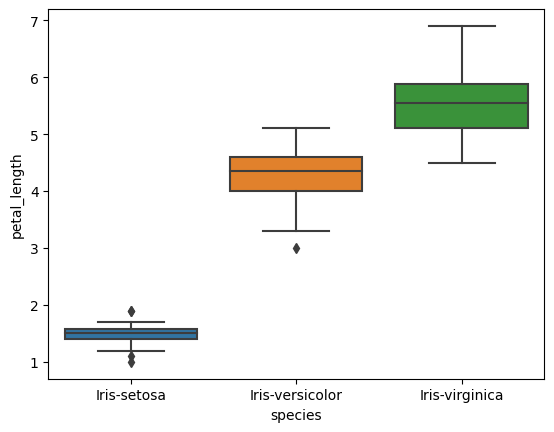

In [11]:
# Création d'un boxplot pour visualiser la distribution de la longueur des pétales selon les espèces
sns.boxplot(x="species", y="petal_length", data=iris)

# Afficher le graphique
plt.show()


 L'Iris-setosa a une longueur de pétale significativement plus courte, avec plusieurs points aberrants (outliers). L'Iris-versicolor a une longueur de pétale modérée, tandis que l'Iris-virginica présente les pétales les plus longs. Les boîtes indiquent également la médiane et l'étendue interquartile pour chaque espèce, avec les moustaches montrant la variation en dehors de cette étendue.

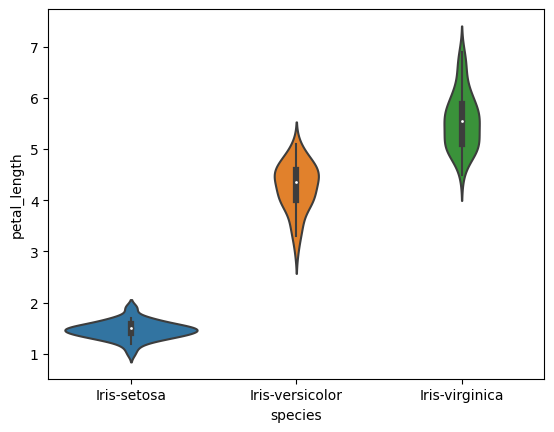

In [12]:
# Création d'un violon plot pour visualiser la distribution de la longueur des pétales selon les espèces
sns.violinplot(x="species", y="petal_length", data=iris)

# Afficher le graphique
plt.show()


Contrairement au boxplot, le violon plot montre la distribution complète, offrant une représentation plus détaillée des variations et de la densité des données pour chaque espèce.


Chaque violon représente la densité de la longueur des pétales pour chaque espèce. L'Iris-setosa a une distribution très étroite avec des pétales plus courts, tandis que l'Iris-versicolor et l'Iris-virginica ont des distributions plus étalées avec des longueurs de pétales plus grandes. Le centre de chaque violon contient un boxplot traditionnel montrant la médiane et l'étendue interquartile.

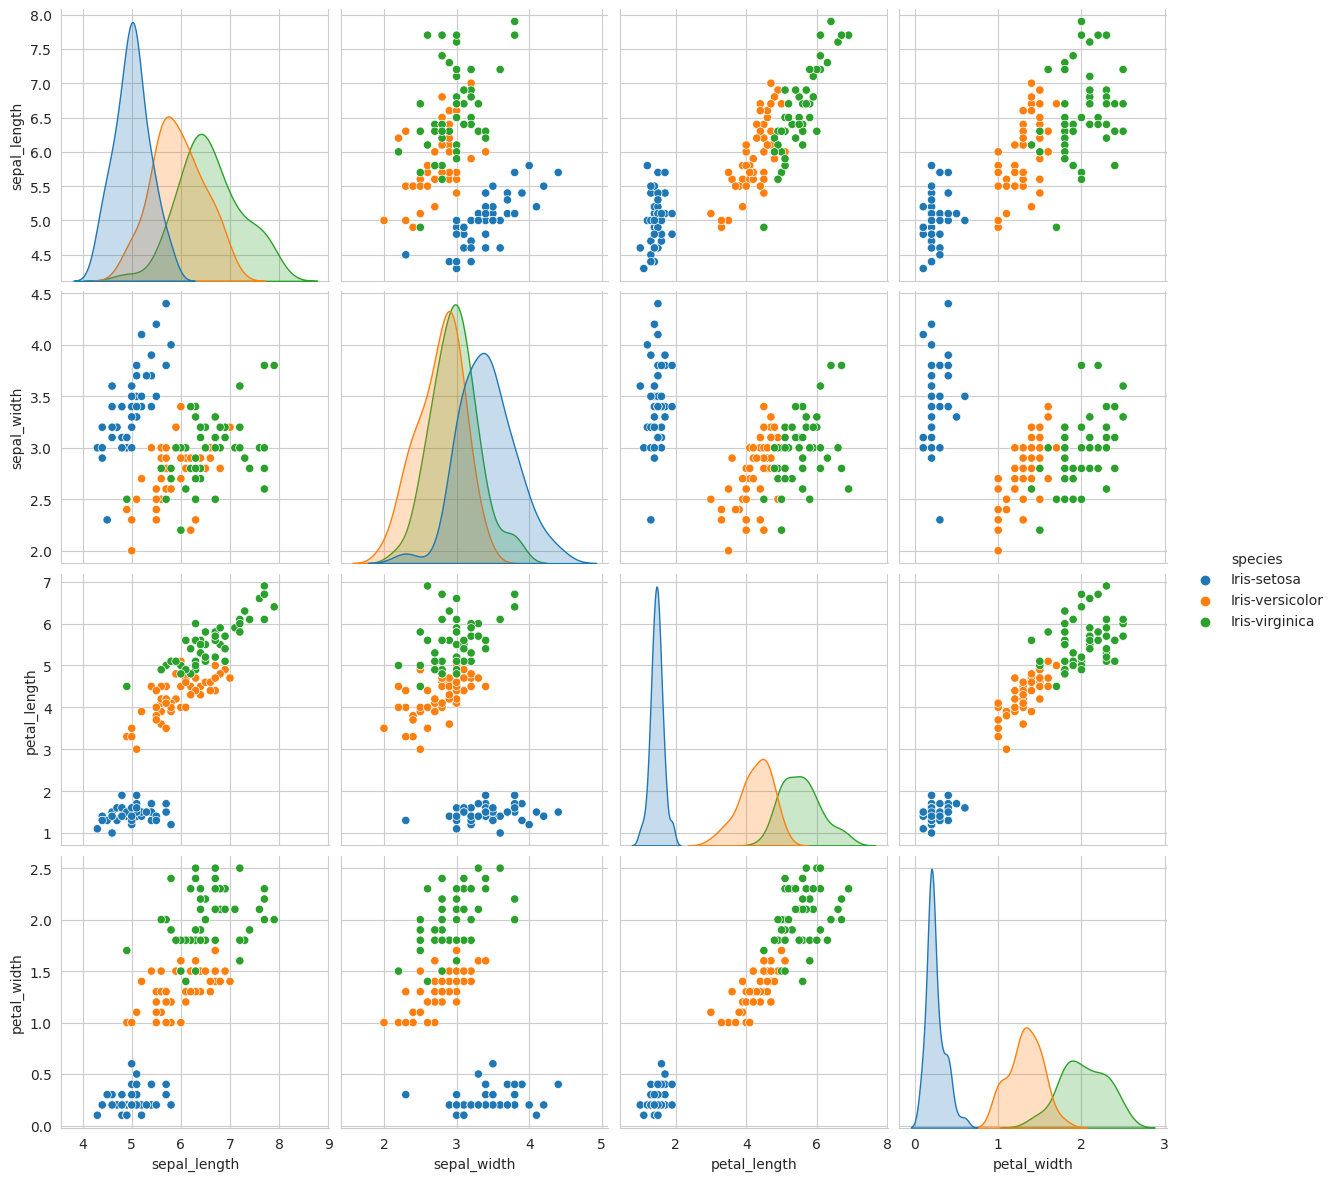

In [13]:
# Appliquer un style de fond "whitegrid" pour des graphiques avec un fond quadrillé
sns.set_style("whitegrid")

# Création d'un pairplot pour visualiser les relations entre toutes les paires de caractéristiques du jeu de données Iris
sns.pairplot(iris, hue="species", height=3)

# Afficher le graphique
plt.show()


Le pairplot est utile pour voir comment les différentes caractéristiques interagissent entre elles et comment elles permettent de distinguer les espèces d'iris.

# Comment implémenter le clustering K-Means ?
* Choisir le nombre de clusters k
* Sélectionner k points aléatoires à partir des données comme centroids (centres des clusters)
* Attribuer tous les points au centre de cluster le plus proche
* Recalculer les centroids des clusters nouvellement formés
* Répéter les étapes 3 et 4



In [14]:
# Trouver le nombre optimal de clusters pour le K-Means

from sklearn.cluster import KMeans

# Liste pour stocker la somme des carrés des distances intra-cluster (WCSS)
wcss = []

# Boucle pour calculer WCSS pour différents nombres de clusters (de 1 à 10)
for i in range(1, 11):
    # Créer un modèle KMeans avec i clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Ajuster le modèle KMeans aux données
    kmeans.fit(x)
    
    # Ajouter la somme des carrés des distances intra-cluster (inertia_) à la liste WCSS
    wcss.append(kmeans.inertia_)


# Utiliser la méthode du coude pour déterminer le nombre optimal de clusters pour le k-means clustering 

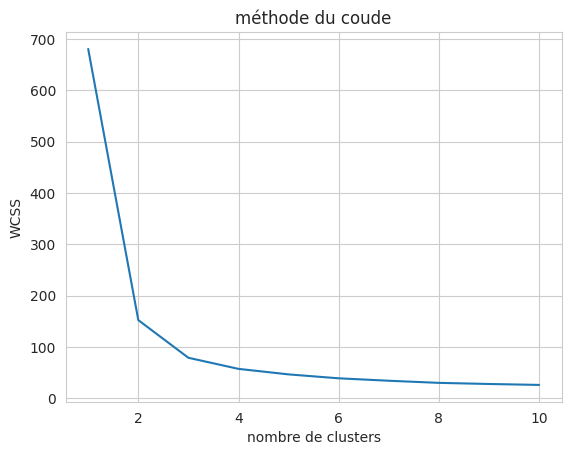

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('méthode du coude')
plt.xlabel('nombre de clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Le graphique représente la méthode du coude utilisée pour déterminer le nombre optimal de clusters dans un algorithme de classification, comme le K-means. L'axe des abscisses montre le nombre de clusters (de 1 à 10), tandis que l'axe des ordonnées représente le WCSS (Within-Cluster Sum of Squares), qui est une mesure de la dispersion à l'intérieur des clusters. Le coude se situe autour de 3 clusters, ce qui suggère que c'est le nombre optimal à choisir pour minimiser la variance sans ajouter de clusters inutiles.

In [16]:
# Importer la classe KMeans depuis la bibliothèque scikit-learn
from sklearn.cluster import KMeans

# Créer une instance de l'algorithme KMeans avec les paramètres suivants :
# n_clusters : nombre de clusters à créer (ici 3)
# init : méthode pour initialiser les centres des clusters (ici 'k-means++' pour une initialisation intelligente)
# max_iter : nombre maximum d'itérations pour chaque exécution de l'algorithme (ici 300)
# n_init : nombre de fois que l'algorithme sera exécuté avec des centres de départ différents (ici 10)
# random_state : état aléatoire pour garantir la reproductibilité des résultats (ici 0)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Appliquer l'algorithme k-means aux données 'x' et prédire les clusters pour chaque point de données
# 'fit_predict' ajuste le modèle aux données et retourne les indices des clusters pour chaque point
y_kmeans = kmeans.fit_predict(x)


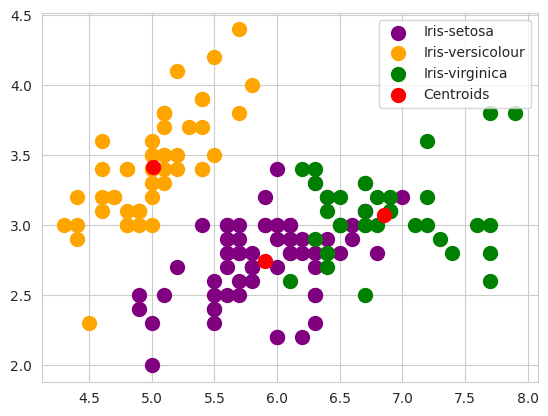

In [17]:
import matplotlib.pyplot as plt

# Visualiser les clusters
# Tracer les points du cluster 0 en violet avec une taille de 100 et une légende 'Iris-setosa'
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='purple', label='Iris-setosa')
# Tracer les points du cluster 1 en orange avec une taille de 100 et une légende 'Iris-versicolour'
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='orange', label='Iris-versicolour')
# Tracer les points du cluster 2 en vert avec une taille de 100 et une légende 'Iris-virginica'
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

# Tracer les centroïdes des clusters
# Tracer les centroïdes en rouge avec une taille de 100 et une légende 'Centroids'
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

# Afficher la légende pour identifier les clusters et les centroïdes
plt.legend()

# Afficher le graphique
plt.show()


# Comment implémenter le clustering GMM (Gaussian Mixture Model) ?
* Choisir le nombre de clusters k.
* Initialiser les paramètres des distributions gaussiennes pour chaque cluster (moyenne, variance, et poids de chaque cluster).
* Pour chaque point, calculer la probabilité qu'il appartienne à chaque cluster à l'aide de la fonction de densité gaussienne.
* Mettre à jour les paramètres des gaussiennes (moyenne, variance, poids) en utilisant les probabilités calculées.
* Répéter les étapes 2 à 4 jusqu'à convergence (les paramètres cessent de changer significativement).

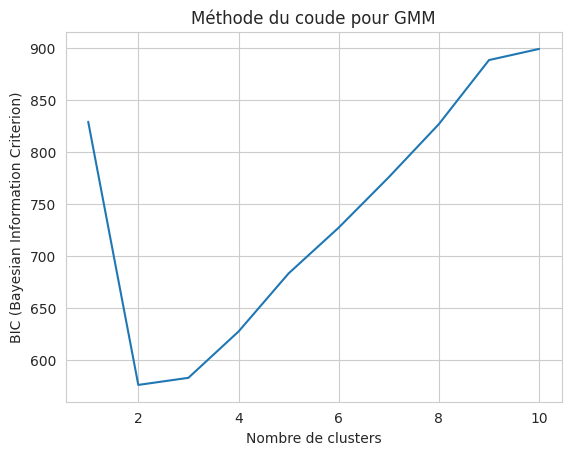

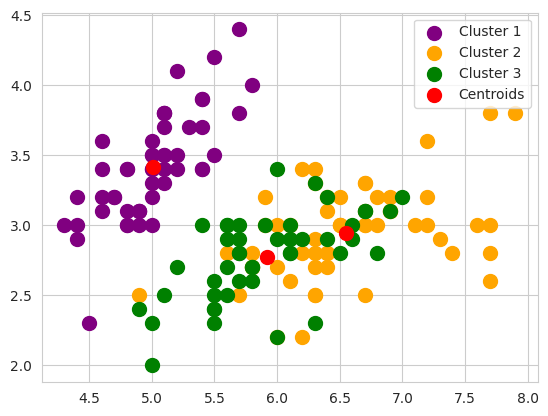

In [18]:
# Importer la classe GaussianMixture depuis la bibliothèque scikit-learn
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Liste pour stocker le score (log-likelihood ou BIC) pour différents nombres de clusters
bic = []

# Boucle pour calculer le BIC (Bayesian Information Criterion) pour différents nombres de clusters (de 1 à 10)
for i in range(1, 11):
    # Créer un modèle GMM avec i clusters
    gmm = GaussianMixture(n_components=i, covariance_type='full', random_state=0)
    
    # Ajuster le modèle GMM aux données
    gmm.fit(x)
    
    # Ajouter le BIC à la liste
    bic.append(gmm.bic(x))

# Tracer le BIC pour déterminer le nombre optimal de clusters (méthode du coude)
plt.plot(range(1, 11), bic)
plt.title('Méthode du coude pour GMM')
plt.xlabel('Nombre de clusters')
plt.ylabel('BIC (Bayesian Information Criterion)')
plt.show()

# Appliquer GMM aux données
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
y_gmm = gmm.fit_predict(x)

# Visualiser les clusters
plt.scatter(x[y_gmm == 0, 0], x[y_gmm == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(x[y_gmm == 1, 0], x[y_gmm == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(x[y_gmm == 2, 0], x[y_gmm == 2, 1], s=100, c='green', label='Cluster 3')

# Tracer les centroïdes des clusters (moyennes des gaussiennes)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=100, c='red', label='Centroids')

plt.legend()
plt.show()


# Comment implémenter le clustering Agglomerative ?

* Choisir le nombre de clusters souhaité.
* Considérer chaque point comme un cluster individuel.
* Calculer les distances entre chaque paire de clusters (points).
* Fusionner les deux clusters les plus proches pour former un nouveau cluster.
* Recalculer les distances entre le nouveau cluster et les autres clusters.
* Répéter les étapes 3 à 5 jusqu'à ce que le nombre souhaité de clusters soit atteint.

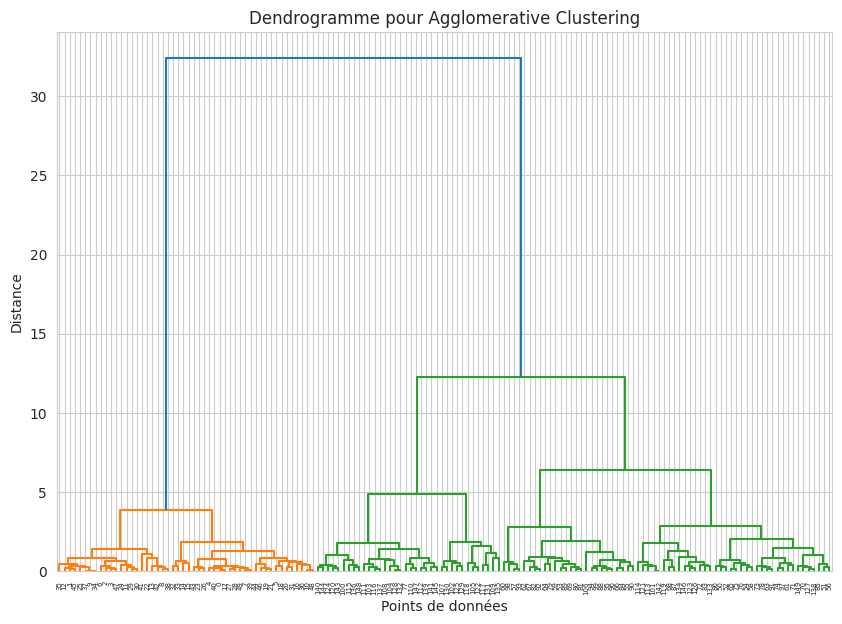

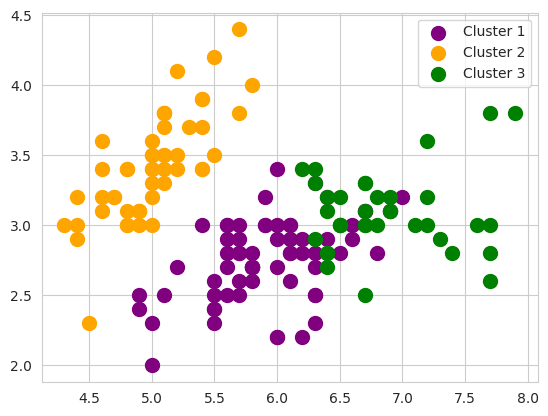

In [19]:
# Importer la classe AgglomerativeClustering depuis la bibliothèque scikit-learn
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Appliquer la méthode linkage pour créer un dendrogramme afin de visualiser le nombre optimal de clusters
Z = linkage(x, method='ward')
plt.figure(figsize=(10, 7))
plt.title('Dendrogramme pour Agglomerative Clustering')
plt.xlabel('Points de données')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

# Appliquer Agglomerative Clustering avec 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Ajuster le modèle aux données
y_agg = agg_clustering.fit_predict(x)

# Visualiser les clusters
plt.scatter(x[y_agg == 0, 0], x[y_agg == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(x[y_agg == 1, 0], x[y_agg == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(x[y_agg == 2, 0], x[y_agg == 2, 1], s=100, c='green', label='Cluster 3')

# Pas de centroïdes car Agglomerative Clustering ne calcule pas explicitement de centres
plt.legend()
plt.show()


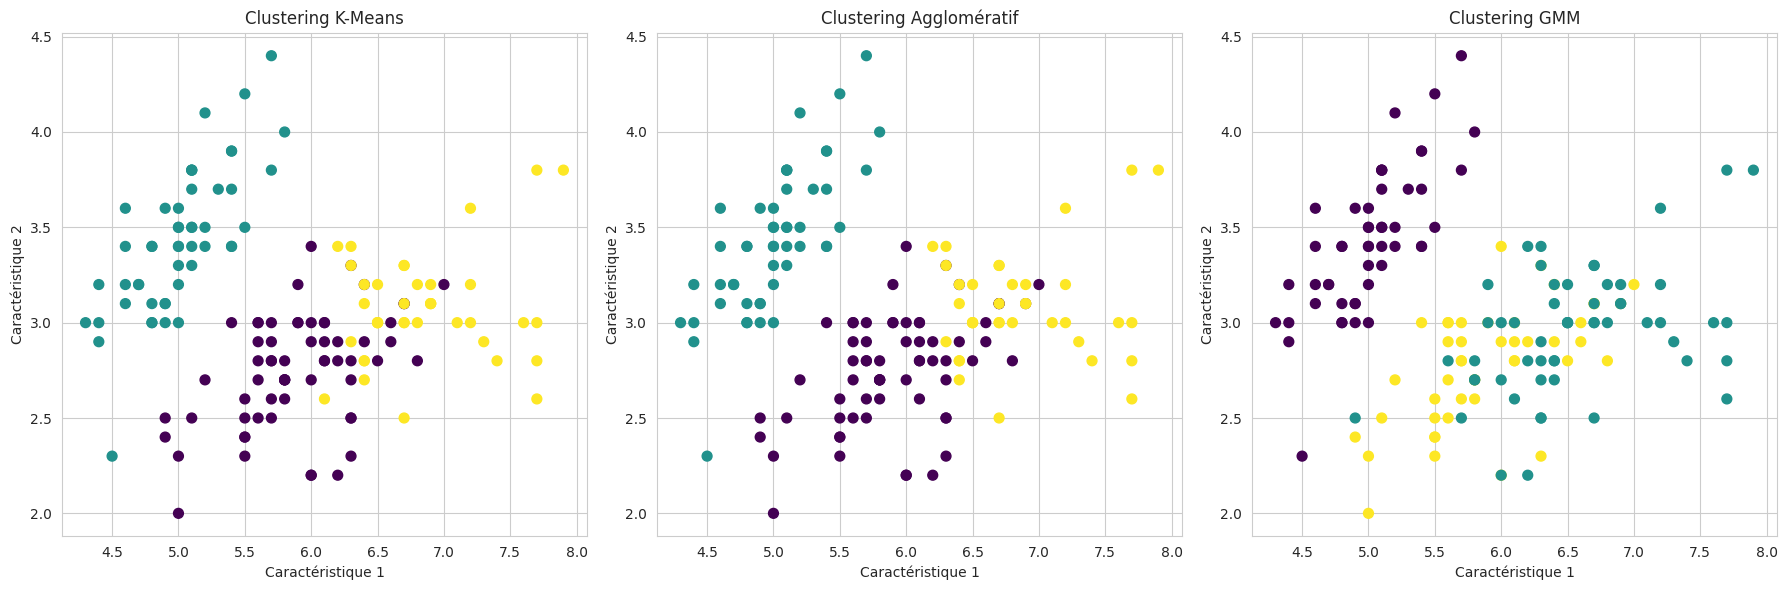

Méthode : K-Means
Indice de Rand Ajusté : 0.7302382722834697
Indice de Silhouette : 0.5528190123564095

Méthode : GMM
Indice de Rand Ajusté : 0.9038742317748124
Indice de Silhouette : 0.5011761635067206

Méthode : Agglomerative
Indice de Rand Ajusté : 0.7311985567707746
Indice de Silhouette : 0.5543236611296419



In [20]:
# Importer les métriques de scikit-learn
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data  # Données d'entrée
y_true = iris.target  # Vérités terrains (150 valeurs)
# Tracer les clusters pour comparer les modèles
plt.figure(figsize=(18, 6))

# Tracé pour KMeans
plt.subplot(1, 3, 1)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('Clustering K-Means')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

# Tracé pour le clustering agglomératif
plt.subplot(1, 3, 2)
plt.scatter(x[:, 0], x[:, 1], c=y_agg, cmap='viridis', s=50)
plt.title('Clustering Agglomératif')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

# Tracé pour le clustering GMM
plt.subplot(1, 3, 3)
plt.scatter(x[:, 0], x[:, 1], c=y_gmm, cmap='viridis', s=50)
plt.title('Clustering GMM')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

# Afficher le graphique
plt.tight_layout()
plt.show()




# y_kmeans, y_gmm, y_agg sont les résultats des méthodes déjà implémentées
methods = {
    'K-Means': y_kmeans,
    'GMM': y_gmm,
    'Agglomerative': y_agg
}

# Initialiser les listes pour stocker les résultats
rand_scores = []
silhouette_scores = []

# Calculer les indices de Rand et silhouette pour chaque méthode
for name, y_pred in methods.items():
    # Calcul de l'indice de Rand ajusté
    rand_index = adjusted_rand_score(y_true, y_pred)
    rand_scores.append(rand_index)
    
    # Calcul de l'indice de silhouette
    silhouette_index = silhouette_score(x, y_pred)
    silhouette_scores.append(silhouette_index)

    print(f"Méthode : {name}")
    print(f"Indice de Rand Ajusté : {rand_index}")
    print(f"Indice de Silhouette : {silhouette_index}\n")


K-Means et Agglomerative Clustering donnent des performances similaires avec des indices de Rand ajustés autour de 0.73, indiquant que ces deux méthodes regroupent les données d'une manière relativement proche de la vérité terrain. L'indice de silhouette est également similaire, autour de 0.55, montrant une bonne séparation entre les clusters.

GMM affiche le meilleur indice de Rand ajusté (0.90), ce qui signifie qu'il correspond mieux aux vraies classes. Cependant, son indice de silhouette (0.50) est légèrement inférieur, indiquant que les clusters sont un peu moins distincts en termes de cohésion interne.

En résumé, GMM semble mieux capturer la structure réelle des données, mais K-Means et Agglomerative Clustering produisent des clusters un peu plus séparés entre eux.

# Graphique 3D 

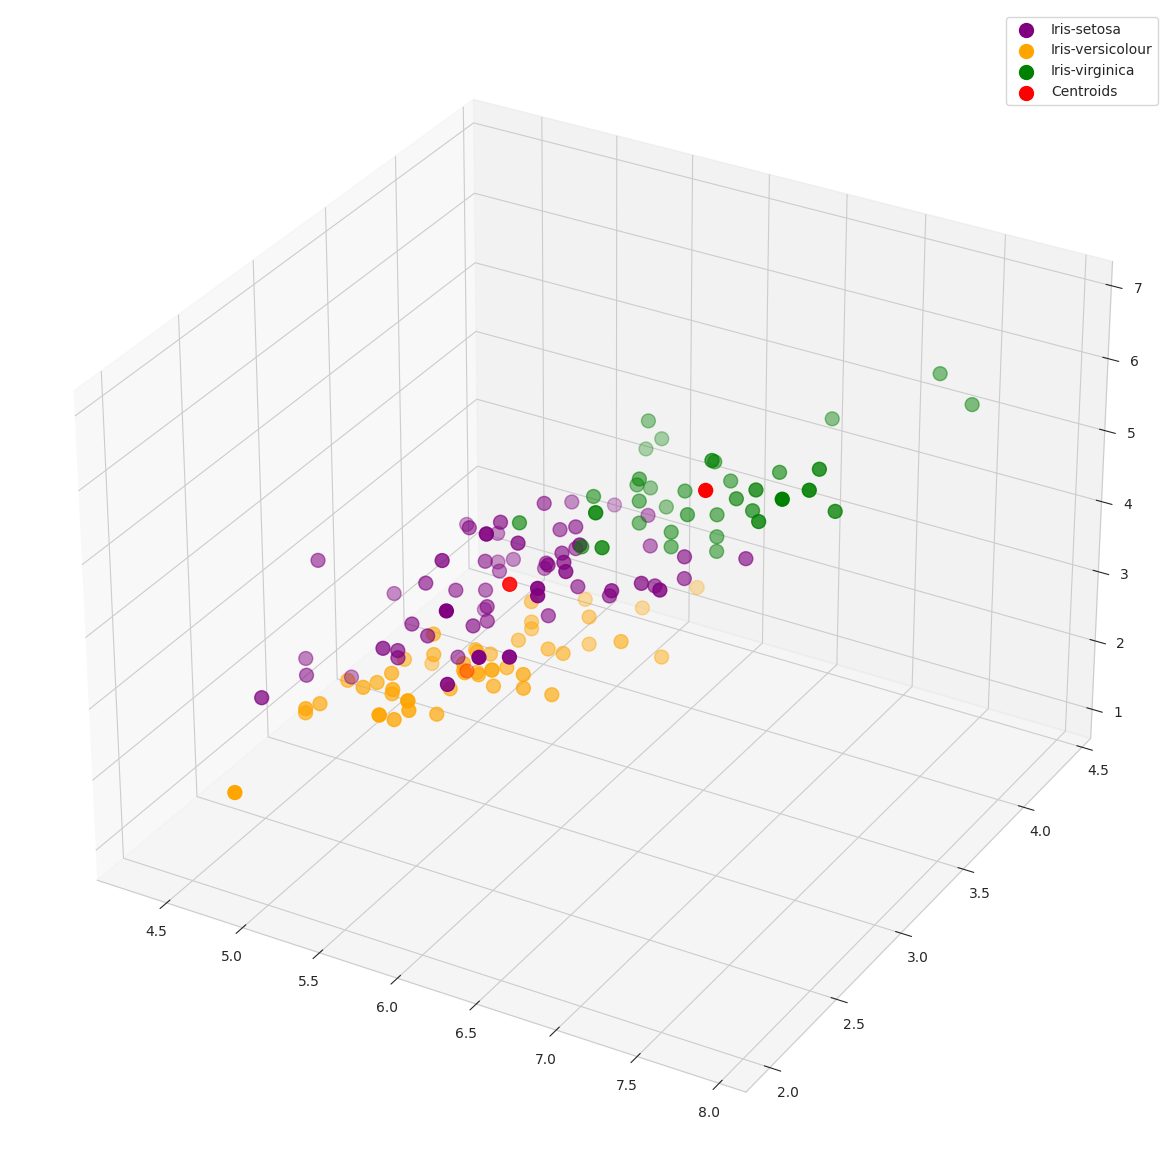

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Créer une figure avec une taille de 15x15 pouces
fig = plt.figure(figsize=(15, 15))

# Ajouter un sous-graphe 3D à la figure
ax = fig.add_subplot(111, projection='3d')

# Tracer les points du cluster 0 en violet avec une taille de 100 et une légende 'Iris-setosa'
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s=100, c='purple', label='Iris-setosa')
# Tracer les points du cluster 1 en orange avec une taille de 100 et une légende 'Iris-versicolour'
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s=100, c='orange', label='Iris-versicolour')
# Tracer les points du cluster 2 en vert avec une taille de 100 et une légende 'Iris-virginica'
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s=100, c='green', label='Iris-virginica')

# Tracer les centroïdes des clusters en rouge avec une taille de 100 et une légende 'Centroids'
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')

# Ajouter la légende pour identifier les clusters et les centroïdes
ax.legend()

# Afficher le graphique
plt.show()


Ce graphique en trois dimensions montre également une représentation des espèces de fleurs de l'ensemble de données Iris. Les trois espèces sont représentées par des couleurs différentes : Iris-setosa (violet), Iris-versicolour (orange), et Iris-virginica (vert). Les points rouges représentent les centroïdes des clusters obtenus par l'algorithme de clustering. Cette visualisation en 3D permet de mieux observer la séparation entre les espèces dans un espace tridimensionnel, probablement basé sur plusieurs caractéristiques des fleurs, comme la longueur et la largeur des pétales et des sépales.